<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
!pip install seaborn

In [2]:
import pandas as pd

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


### Determine how the data is distributed


Plot the distribution curve for the column `ConvertedComp`.


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy.stats import norm 
import statistics 

In [20]:
df['ConvertedComp'].describe()


count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

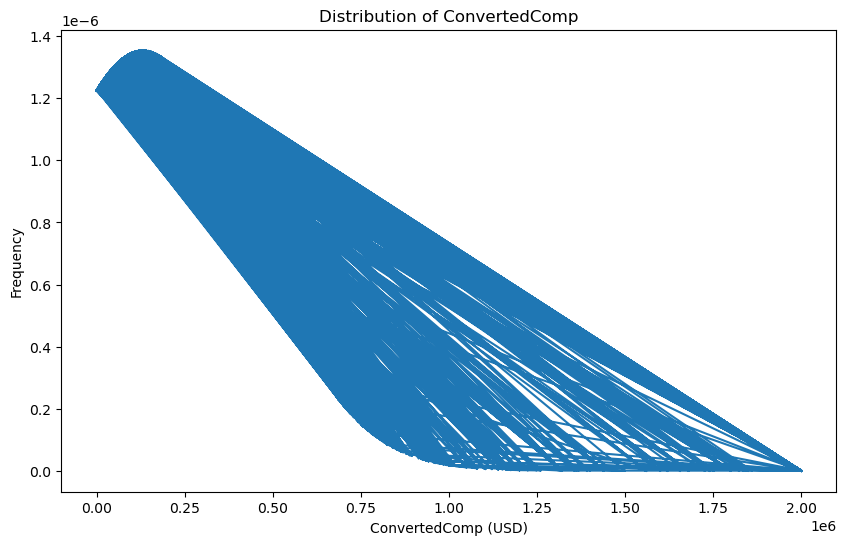

In [21]:
# Plot the distribution curve for 'ConvertedComp'
x_axis = df['ConvertedComp']
mean = df['ConvertedComp'].mean()
std = df['ConvertedComp'].std()

plt.figure(figsize=(10, 6))
plt.plot(x_axis, norm.pdf(x_axis, mean, std))
plt.title('Distribution of ConvertedComp')
plt.xlabel('ConvertedComp (USD)')
plt.ylabel('Frequency')
plt.show()

Plot the histogram for the column `ConvertedComp`.


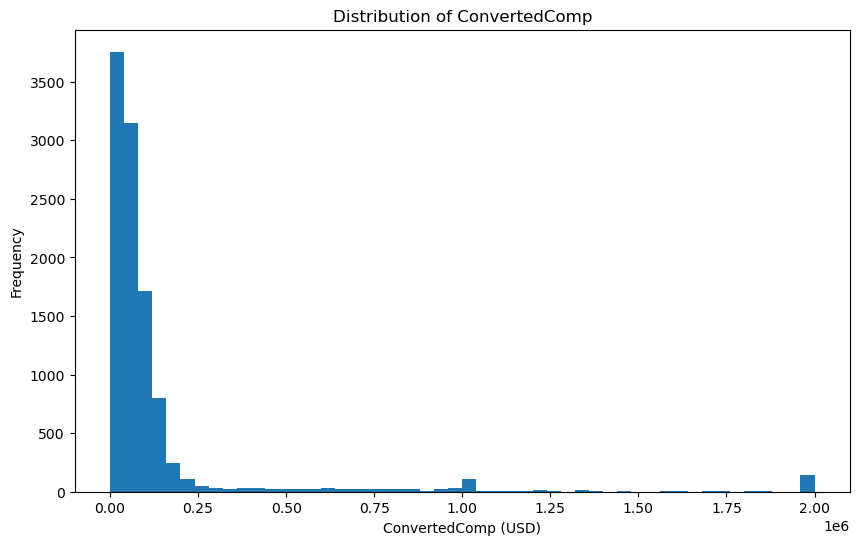

In [16]:
# Plot the distribution curve for 'ConvertedComp'
plt.figure(figsize=(10, 6))
df['ConvertedComp'].plot(kind = 'hist', bins = 50)
# sns.histplot(df['ConvertedComp'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of ConvertedComp')
plt.xlabel('ConvertedComp (USD)')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [29]:
df['Age'].median()

29.0

In [8]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [10]:
all_gender_num = df['Gender'].value_counts()

man_responders = all_gender_num.get('Man', 0)

print(man_responders)

10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [12]:
# Filter the DataFrame for respondents who identified as only 'Woman'
woman_df = df[df['Gender'] == 'Woman']

# Calculate the median 'ConvertedComp' for these respondents
median_converted_comp_woman = woman_df['ConvertedComp'].median()

# Print the result
print(f'Median ConvertedComp for respondents identifying as Woman: {median_converted_comp_woman}')

Median ConvertedComp for respondents identifying as Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [14]:
# Get the five-number summary for the 'Age' column
age_summary = df['Age'].describe(percentiles=[.25, .5, .75])

# Print the result
print('Five-number summary for the Age column:')
print(age_summary[['min', '25%', '50%', '75%', 'max']])

Five-number summary for the Age column:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


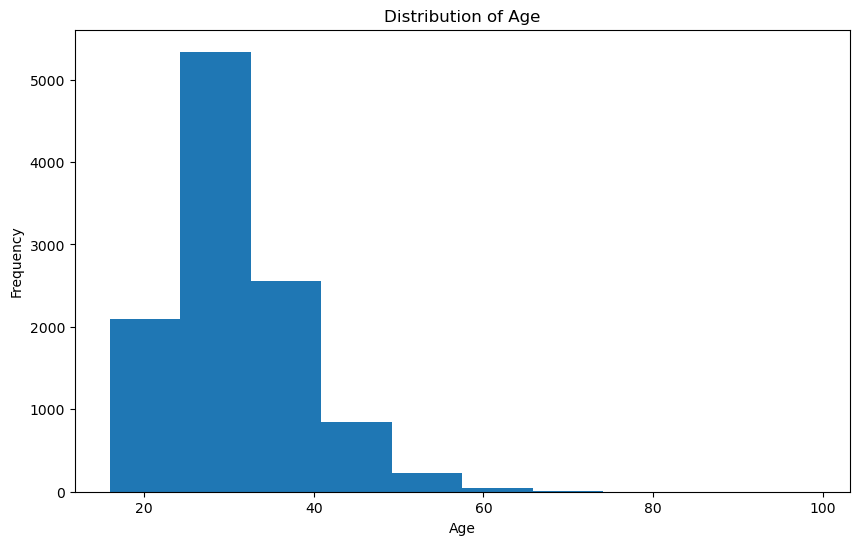

In [15]:
plt.figure(figsize=(10, 6))
df['Age'].plot(kind = 'hist')
# sns.histplot(df['ConvertedComp'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


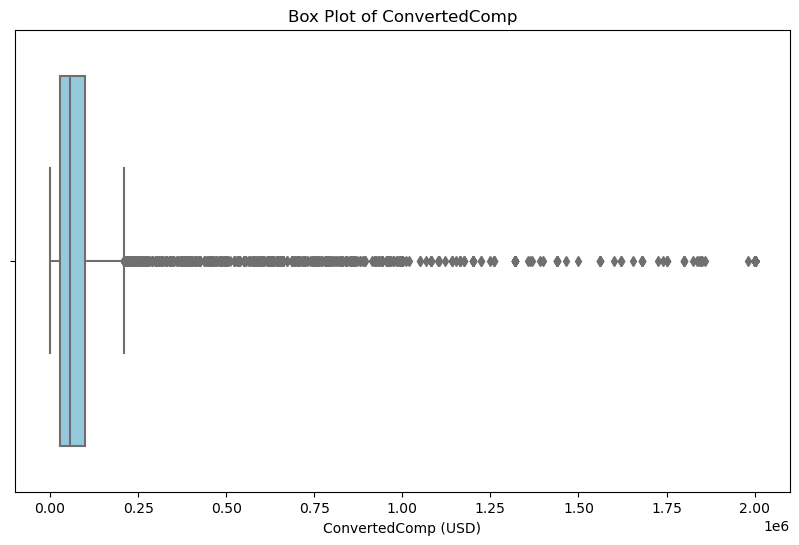

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedComp'], color='skyblue')
plt.title('Box Plot of ConvertedComp')
plt.xlabel('ConvertedComp (USD)')
plt.show()

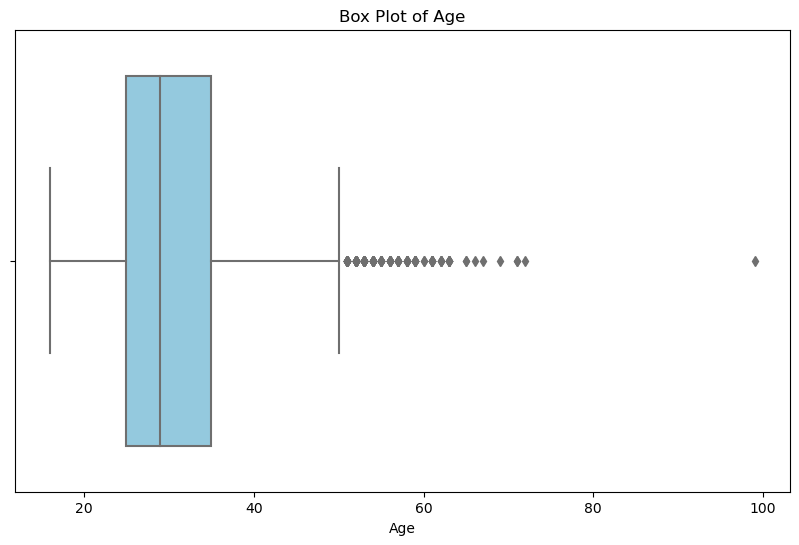

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'], color='skyblue')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [23]:
# Calculate the Interquartile Range (IQR) for 'ConvertedComp'
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1

# Print the result
print(f'Interquartile Range (IQR) for ConvertedComp: {iqr:.2f}')

Interquartile Range (IQR) for ConvertedComp: 73132.00


Find out the upper and lower bounds.


In [25]:
# Calculate upper and lower bounds for potential outliers
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

upper_bound_max = df['ConvertedComp'].max()
lower_bound_max = df['ConvertedComp'].min()

# Print the result
print(f'Upper Bound for ConvertedComp: {upper_bound:.2f}')
print(f'Lower Bound for ConvertedComp: {lower_bound:.2f}')

print("Max:", upper_bound_max)
print("Min:", lower_bound_max)

Upper Bound for ConvertedComp: 209698.00
Lower Bound for ConvertedComp: -82830.00
Max: 2000000.0
Min: 0.0


Identify how many outliers are there in the `ConvertedComp` column.


In [26]:
# Identify outliers
outliers = df[(df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)]

# Count the number of outliers
num_outliers = len(outliers)

# Print the result
print(f'Number of outliers in ConvertedComp: {num_outliers}')

Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


## Correlation


In [27]:
# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Print the result
print(f'Original DataFrame size: {len(df)}')
print(f'New DataFrame size without outliers: {len(df_no_outliers)}')


Original DataFrame size: 11398
New DataFrame size without outliers: 9703


In [33]:
df_no_outliers['ConvertedComp'].median()

52704.0

In [34]:
df_no_outliers['ConvertedComp'].mean()

59883.20838915799

### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [28]:
# Find the correlation between 'Age' and all other numerical columns
age_correlation = df.corr()['Age']

# Print the result
print('Correlation between Age and other numerical columns:')
print(age_correlation)

Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
